### Import libraries

In [1]:
#Import the necessary libraries.
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression

### Load the data to read and explore 

In [2]:
data = 'used_cars_data.csv'
data1 = pd.read_csv(data) #load and read the csv file as a dataframe
df = data1.copy() #making a copy to avoid changes to the data
df.head()  # load the first five rows in the dataset

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.tail() #load the last five rows

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [4]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset.')  # f-string to get the shape of dataset

There are 7253 rows and 14 columns in this dataset.


In [5]:
np.random.seed(68) #let's take a look at 10 random rows in the dataset
df.sample(n=10) #setting random seed to '68', so that we get same 10 rows every time

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5441,5441,Ford Endeavour 3.2 Titanium AT 4X4,Coimbatore,2017,54650,Diesel,Automatic,First,10.91 kmpl,3198 CC,197 bhp,7.0,NaN,30.35
691,691,Hyundai EON Era Plus,Kochi,2016,36700,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN,4.38
6394,6394,Maruti Eeco 5 Seater AC,Delhi,2014,51200,Petrol,Manual,First,15.1 kmpl,1196 CC,73 bhp,5.0,4.56 Lakh,NaN
2130,2130,Hyundai Santro GLS I - Euro II,Coimbatore,2012,51019,Petrol,Manual,First,0.0 kmpl,999 CC,null bhp,5.0,NaN,3.48
3047,3047,Volkswagen Polo Diesel Comfortline 1.2L,Kolkata,2012,45000,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,NaN,2.99
1626,1626,Mercedes-Benz E-Class 2009-2013 E350 CDI Avant...,Kochi,2011,92239,Diesel,Automatic,Second,11.5 kmpl,2987 CC,210 bhp,5.0,NaN,10.60
4377,4377,Porsche Cayenne Diesel,Coimbatore,2015,60395,Diesel,Automatic,First,16.12 kmpl,2967 CC,245 bhp,5.0,NaN,45.82
6553,6553,Hyundai Verna 1.6 CRDi EX AT,Delhi,2013,37000,Diesel,Automatic,First,22.32 kmpl,1582 CC,126.3 bhp,5.0,NaN,NaN
6552,6552,Volkswagen Polo Diesel Comfortline 1.2L,Pune,2011,83000,Diesel,Manual,Second,22.07 kmpl,1199 CC,73.9 bhp,5.0,NaN,NaN
6084,6084,Chevrolet Sail Hatchback 1.2,Kochi,2015,47572,Petrol,Manual,First,18.2 kmpl,1199 CC,82.5 bhp,5.0,NaN,NaN


* We can drop the S.No column as its repetitive of the index and not required in further analysis.
* The Mileage, Engine and Power column are represented as strings when they should be in numerical.
* Mileage has a 0.0 value that should be replace by Nan
* Power has string 'null bhp' which should be replaced by Nan
* The above random sample shows that some columns have a lot of missingness, so that needs to be analysed later and New_price particularly has a lot missing values.
* Price is the dependent variable

In [6]:
df.drop(['S.No.'],axis=1,inplace=True) #dropping the S.No column

### Checking the data types and missing values in the columns.

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


**Observations**
* There are 7253 entries across 13 columns
* Mileage, Engine, Power and New_Price columns are in Object datatype.These columns need to be converted to Numerical. 
* The rest of the object datatype need to be converted to Category.
    `coverting "objects" to "category" reduces the space required to store the dataframe. It also helps in analysis`
* We can also see that New_Price column has only 1006 entries. 
* The Price column also has significant missing values.
* Power, Mileage, Seats and Engine have comparatively lesser missing values than the above two.

* From the above details, we see that New_Price column has almost 80% of data missing. This may impact the performance of the model to caluculate the price. Therefore we will drop this column for further analysis.


In [8]:
df.drop(["New_Price"],axis=1,inplace=True)

* Let's replace any possible corrupt values like, 0.0 to Nan before proceeding.

In [9]:
from scipy.stats import norm
num_col = df.select_dtypes(include=np.number).columns.tolist()

for col in num_col:
    df[col]=df[col].replace(0.0,np.nan)

In [10]:
num_col

['Year', 'Kilometers_Driven', 'Seats', 'Price']

## Processing Columns:
- Before getting the summary statistics of the data to analyse the distribution, we must convert them to numerical columns.

In [11]:
num_values = []
#the loop will add all the columns we want to convert form object to numerical into a list
# we can then use this list for conversion
for colname in df.columns[df.dtypes == 'object']:  # only need to consider string columns
    if df[colname].str.endswith('pl').any() or df[colname].str.endswith('kg').any() or df[colname].str.endswith('CC').any() or df[colname].str.endswith('bhp').any() or df[colname].str.endswith('Lakh').any():  
        # using `.str` to use an element-wise string method to select the required columns
        num_values.append(colname)
    
print(num_values)

['Mileage', 'Engine', 'Power']


In [12]:
#Writing a function that will help split the string from the numerical values in the columns
#This function will also drop the string and convert to float datatype.
#This function will ensure a clean and faster code
def obj_to_num(n):
    if isinstance(n,str): #checks if the columns are string datatype
        if n.endswith('kmpl'):
            return float(n.split('kmpl')[0])     
        elif n.endswith('km/kg'):                   
            return float(n.split('km/kg')[0])
        elif n.endswith('CC'):
            return float(n.split('CC')[0])
        elif n.startswith('null'):     #replaces values that have string 'null bhp' to Nan
            return(np.nan)          
        elif n.endswith('bhp'):
             return float(n.split('bhp')[0])
    else: 
        return np.nan

for colname in num_values:
    df[colname] = df[colname].apply(obj_to_num)#applying above function to the column list    
    df[colname]=df[colname].replace(0.0,np.nan)

## Fixing Datatypes

In [13]:
df["Name"]=df["Name"].astype("category")
df["Location"]=df["Location"].astype("category")
df["Fuel_Type"]=df["Fuel_Type"].astype("category")
df["Transmission"]=df["Transmission"].astype("category")
df["Owner_Type"]=df["Owner_Type"].astype("category") 

In [14]:
np.random.seed(68) 
df.sample(n=10) #re-checking the same 10 random rows

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5441,Ford Endeavour 3.2 Titanium AT 4X4,Coimbatore,2017,54650,Diesel,Automatic,First,10.91,3198.0,197.0,7.0,30.35
691,Hyundai EON Era Plus,Kochi,2016,36700,Petrol,Manual,First,21.10,814.0,55.2,5.0,4.38
6394,Maruti Eeco 5 Seater AC,Delhi,2014,51200,Petrol,Manual,First,15.10,1196.0,73.0,5.0,NaN
2130,Hyundai Santro GLS I - Euro II,Coimbatore,2012,51019,Petrol,Manual,First,NaN,999.0,NaN,5.0,3.48
3047,Volkswagen Polo Diesel Comfortline 1.2L,Kolkata,2012,45000,Diesel,Manual,First,22.07,1199.0,73.9,5.0,2.99
1626,Mercedes-Benz E-Class 2009-2013 E350 CDI Avant...,Kochi,2011,92239,Diesel,Automatic,Second,11.50,2987.0,210.0,5.0,10.60
4377,Porsche Cayenne Diesel,Coimbatore,2015,60395,Diesel,Automatic,First,16.12,2967.0,245.0,5.0,45.82
6553,Hyundai Verna 1.6 CRDi EX AT,Delhi,2013,37000,Diesel,Automatic,First,22.32,1582.0,126.3,5.0,NaN
6552,Volkswagen Polo Diesel Comfortline 1.2L,Pune,2011,83000,Diesel,Manual,Second,22.07,1199.0,73.9,5.0,NaN
6084,Chevrolet Sail Hatchback 1.2,Kochi,2015,47572,Petrol,Manual,First,18.20,1199.0,82.5,5.0,NaN


In [15]:
df.info()  #re-checking the dataset again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7170 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7199 non-null   float64 
 11  Price              6019 non-null   float64 
dtypes: category(5), float64(5), int64(2)
memory usage: 520.7 KB


* All datatypes are now fixed and the memory useage has reduced.
* We noticed that the number of missing values has also increased

### Summary of Categorical Variabels

In [16]:
df.describe(include=["category"]).T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Observations:**
- We see that ther are 2041 total unique Cars
- More cars are sold in Mumbai and Diesel is the preffered Fuel Type
- Most of the cars sold are Manual Transmission and have only had one previous owner.

- For further processing we have to make the data more manageable.
- Let's group the cars by Brand and Model

In [17]:
df[['Car_Brand','Model']] = df.Name.str.split(n=1,expand=True) #splitting the Brand and the car model

In [18]:
Brand_name=df['Car_Brand'].unique()
Model=df['Model'].unique() # Model names are unique to the Car Brands. 

In [19]:
Brand_name #Checking car brand names 

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

**Observations**:
- We see that Land Rover is mentioned as Land and the Brand Isuzu is mentioned twice

In [20]:
df['Car_Brand']=df['Car_Brand'].replace('Land','Land_Rover') 
df['Car_Brand']=df['Car_Brand'].replace('ISUZU','Isuzu')  #correcting the brands
df['Car_Brand'].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land_Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Ambassador          1
Smart               1
OpelCorsa           1
Lamborghini         1
Hindustan           1
Name: Car_Brand, dtype: int64

**Observations**:
- Maruti and Hyundai are the most popular cars brands
- Honda and Toyota are the next most popular brands
- We also see that the expensive luxury car brands are very few

### Missing Value Treatment:
- We will replace the missing values in Power,Engine,Mileage and Seats with its median value.

In [21]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

In [22]:
numeric_columns.remove('Price') #It's the dependent variable
medianFiller = lambda x: x.fillna(x.median())
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

* The Price Column also has missing values(1234) that needs to be treated. 
* Hence we will calculate Median Price per Brand and per Brand's model and replace the missing values in Price column

In [23]:
Median1=[] #creating an empty list to add the median Price of Cars per Brand
for i in range(len(Brand_name)):
    x=df['Price'][df['Car_Brand']==Brand_name[i]].median()
    Median1.append(x)

In [24]:
Median2=[] #Creating an empty list to add the median price of cars per Car model
for i in range(len(Model)):
    x=df['Price'][df['Model']==Model[i]].median()
    Median2.append(x)

In [25]:
df['Price']= df['Price'].fillna(0.0) #replacing the missing values with float 0.0

In [26]:
for i in range(len(df)):  #running a loop to check every row in df dataset
    if df.Price[i]==0.00:
        for j in range(len(Model)):  
            if df.Model[i]==Model[j]:  #Comparing the Car model  names in both datasets
                df.Price[i]=Median2[j]  #replacing the Price of the car with the median price of its subsequent model
            

In [27]:
df.info() #rechecking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7253 non-null   float64 
 8   Engine             7253 non-null   float64 
 9   Power              7253 non-null   float64 
 10  Seats              7253 non-null   float64 
 11  Price              7075 non-null   float64 
 12  Car_Brand          7253 non-null   object  
 13  Model              7253 non-null   object  
dtypes: category(5), float64(5), int64(2), object(2)
memory usage: 634.0+ KB


In [28]:
df[df['Price'].isna()]
  #checking the rows with missing Price Value

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Model
6021,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,NaN,Toyota,Innova Crysta Touring Sport 2.4 MT
6037,Maruti Swift AMT ZXI,Kochi,2019,15409,Petrol,Automatic,First,22.00,1197.0,81.80,5.0,NaN,Maruti,Swift AMT ZXI
6042,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.50,1493.0,94.00,5.0,NaN,Skoda,Laura 1.8 TSI Ambition
6043,Honda Civic 2010-2013 1.8 S MT Inspire,Bangalore,2011,40000,Petrol,Manual,Second,15.50,1799.0,132.00,5.0,NaN,Honda,Civic 2010-2013 1.8 S MT Inspire
6076,Toyota Etios Liva 1.4 VXD,Pune,2016,104350,Diesel,Manual,First,23.59,1364.0,67.04,5.0,NaN,Toyota,Etios Liva 1.4 VXD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7225,Skoda Superb Petrol Ambition,Delhi,2010,40000,Petrol,Manual,First,13.10,1798.0,157.80,5.0,NaN,Skoda,Superb Petrol Ambition
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,NaN,Tata,Tiago 1.05 Revotorq XT Option
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,NaN,Ford,EcoSport 1.5 Petrol Ambiente
7232,Jeep Compass 1.4 Sport,Mumbai,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,NaN,Jeep,Compass 1.4 Sport


* The above mentioned cars appear only once in the dataset. Hence we dont have a median price value per its model.
* Therefore we will replace the missing Price of these cars with the median Price of its corresponding Brand, that was calculated earlier. 

In [29]:
df['Price']= df['Price'].fillna(0.0) #replacing the missing values with float 0.0
for i in range(len(df)):  #running a loop to check every row in df dataset
    if df.Price[i]==0.00:
        for j in range(len(Brand_name)):  
            if df.Car_Brand[i]==Brand_name[j]:  #Comparing the brand names in both datasets
                df.Price[i]=Median1[j]     #replacing with corresponding missing values

In [30]:
df[df['Price'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Model
6216,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,14.1,1995.0,94.0,5.0,NaN,Hindustan,Motors Contessa 2.0 DSL
7067,OpelCorsa 1.4Gsi,Hyderabad,2005,50000,Petrol,Manual,Second,14.2,1389.0,88.0,5.0,NaN,OpelCorsa,1.4Gsi


In [31]:
#Dropping the above two cars as there are only one of each per brand
#Also we do not have any further information to calculate its price
df.dropna(axis=0,inplace=True)
df.shape  #we now have 7251 rows and 14 columns

(7251, 14)

### Summary of Numerical Columns

In [32]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7251.000,2013.369,3.247,1998.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7251.000,58699.394,84439.271,171.000,34000.000,53416.000,73000.000,6500000.000
Mileage,7251.000,18.346,4.134,6.400,15.400,18.200,21.100,33.540
Engine,7251.000,1615.769,593.534,72.000,1198.000,1493.000,1968.000,5998.000
Power,7251.000,112.318,52.929,34.200,77.000,94.000,138.030,616.000
Seats,7251.000,5.278,0.807,2.000,5.000,5.000,5.000,10.000
Price,7251.000,9.328,10.863,0.000,3.500,5.500,9.750,160.000


**Observations**:
* Year:
    - Mean Year of car's is 2013 which is one year short of median. Year starts from 1998 till 2019 implying older to latest car models
* Kilometers_Driven: 
    - The Mean is slightly higher than the median, but the max value is very hight, suggesting outliers
* Mileage: 
    - The Mean and Median of Mileage are fairly close
* Engine and Power & Price
    - The Mean value is significantly higher than the median for all three variables. 
    - Average Price is at 9.33 Lakhs. The Variance is greater than the Mean which suggests wide distribution(skewness) of data. 

## Exploratory Data Analysis:
### Univariate Analysis Each Numerical Column:

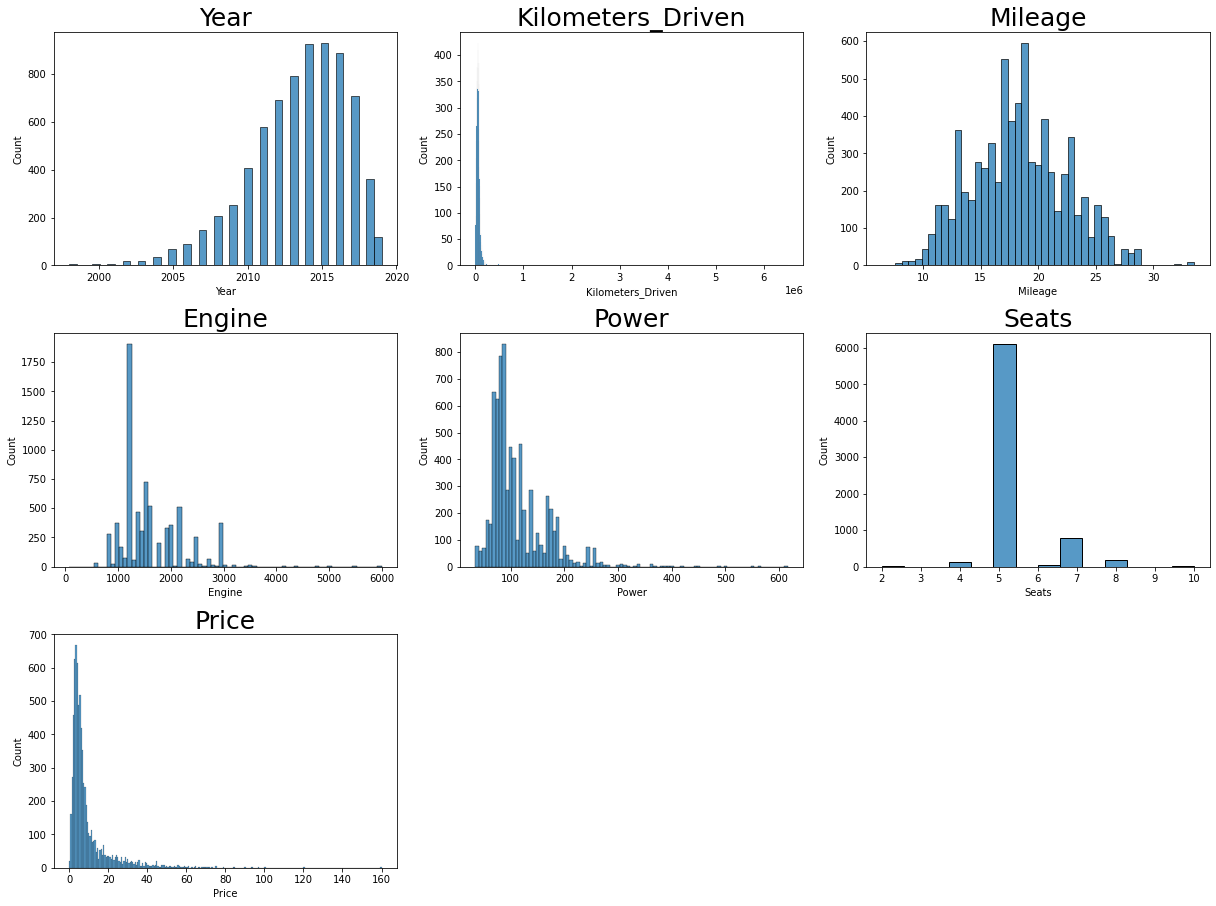

In [33]:
#Performing Univariate Analysis to study the central tendency and dispersion
#Plotting histogram to study distribution
from scipy.stats import norm
Uni_num = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))
for i in range(len(Uni_num)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    sns.histplot(df[Uni_num[i]],kde=False)
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

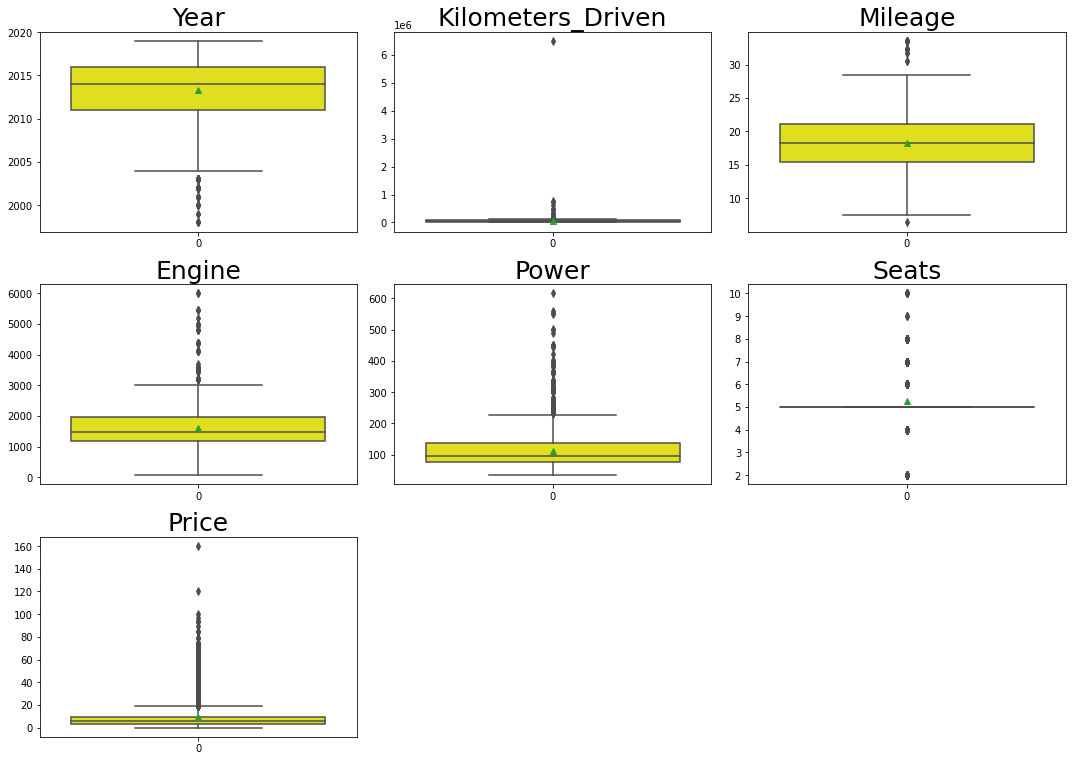

In [34]:
#Plotting a box plot to study central tendency
plt.figure(figsize=(15,35))
for i in range(len(Uni_num)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df[Uni_num[i]],showmeans=True, color='yellow')
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

**Observations:** From Both Histogram and Box plots :

* Only Mileage has a somewhat normal distribution
* Year is left-skewed and has comparatively less outliers in the lower end.
* Engine & Power:
    - Both columns are right-skwed with a moderate Inter-Quartile Range and several outliers at the higher scale.
      Power has more outliers comapred to Engine. 
* Kilometer_Driven and Price:
    - Both these columns are heavily right-skewed, with Kilometers_Driven having a very small IQR and one large outlier in the max end. Price column also has several outliers in the higher end. 
    We will treat these outliers as they might have adverse effect in the accuracy of the prediction. But sometimes outliers might have independent significance to the data.
    So, We will also the building model to decide on the outlier treatment

## Feature Engineering:

### Grouping Location by Regions

In [35]:
regions ={'Delhi':'North','Jaipur':'North',
          'Chennai':'South','Coimbatore':'South','Hyderabad':'South','Bangalore':'South','Kochi':'South',
        'Kolkata':'East',
         'Mumbai':'West','Pune':'West','Ahmedabad':'West'}
df['Region']=df['Location'].replace(regions)

### Binning the Car Names by different Price Levels:
- We have 33 car brands and even higher individual models. 
- To manage the data subesequently, we will bin them according to their Price Ranges; from lower/economic cars to luxury/expensive cars
- This will reduce total categories of Cars to just six.

In [36]:
df.drop(["Car_Brand","Model"],axis=1,inplace=True) # no longer needed for Analysis
df['Car_Type'] = pd.cut(df['Price'],[-np.inf,5.5,10.5,20.5,45.0,75.0,np.inf],
                       labels=["Tier1","Tier2","Tier3","Tier4","Tier5","Tier6"])

df['Car_Type'].value_counts()

Tier1    3638
Tier2    1916
Tier3     896
Tier4     669
Tier5     120
Tier6      12
Name: Car_Type, dtype: int64

In [37]:
df.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Region,Car_Type
6898,Ford EcoSport 1.5 Ti VCT MT Titanium,Coimbatore,2018,12899,Petrol,Manual,First,15.850,1499.000,110.400,5.000,5.750,South,Tier2


In [38]:
# #Univariate Analysis on Categorical Variables
# categorical_val = df.select_dtypes(exclude=np.number).columns.tolist()
# categorical_val.remove('Name')
# categorical_val.remove('Location')

In [39]:
df[df['Fuel_Type']=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Region,Car_Type
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,18.200,72.000,41.000,5.000,13.000,South,Tier3
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,18.200,1798.000,73.000,5.000,12.750,West,Tier3


- There are only two cars running in Electric Fuel in this dataset

### Coorelation Matrix:

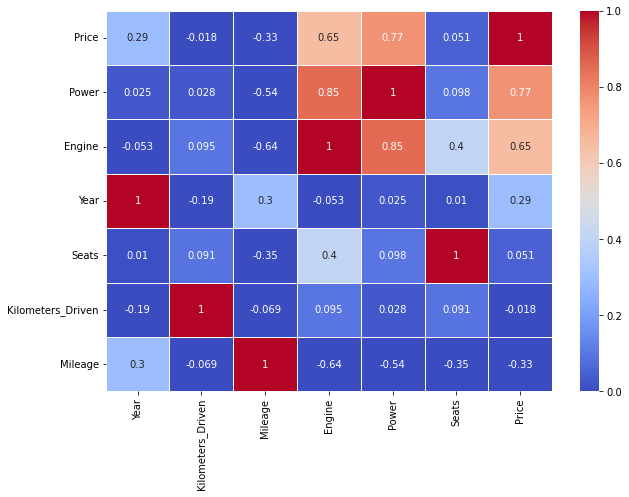

In [40]:
corr= df.corr().sort_values(by=['Price'],ascending=False) #coorelation matrix with respect to dependent variable Price
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot= True,vmin=0,vmax=1, cmap='coolwarm',linewidths=0.75)
plt.show()

**Insights**:
* Price has high positive correlation with Engine and Power and a lower positive correlation with Year.
* Price has a lower negative correlation with Mileage 
* Engine and Power have a very high positive correlation.
* Mileage has a high negative correlation with Engine and Power

### Bivariate and Multivariate Analysis:

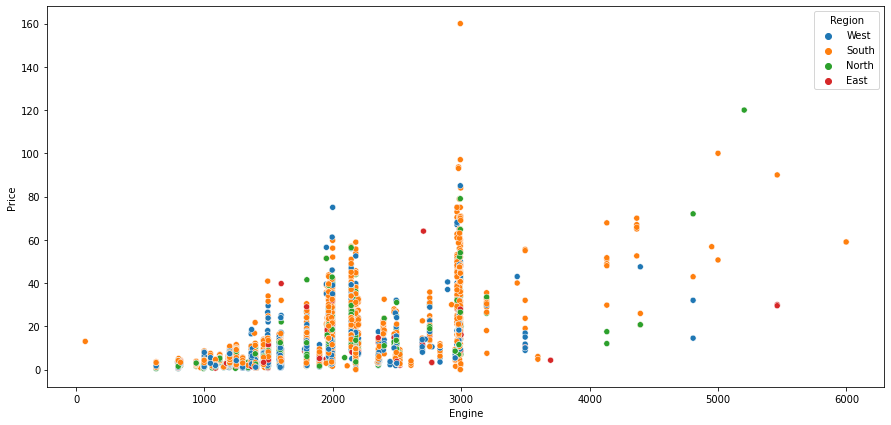

In [41]:
#Analysis of variables that have high correlation with Price
#Price Vs Engine Vs Region
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,y='Price',x='Engine',hue='Region')
plt.show()

**Observations**:
* We see that as Engine capacity increases Price of cars also increase.
* We also notice several exceptions to the above case

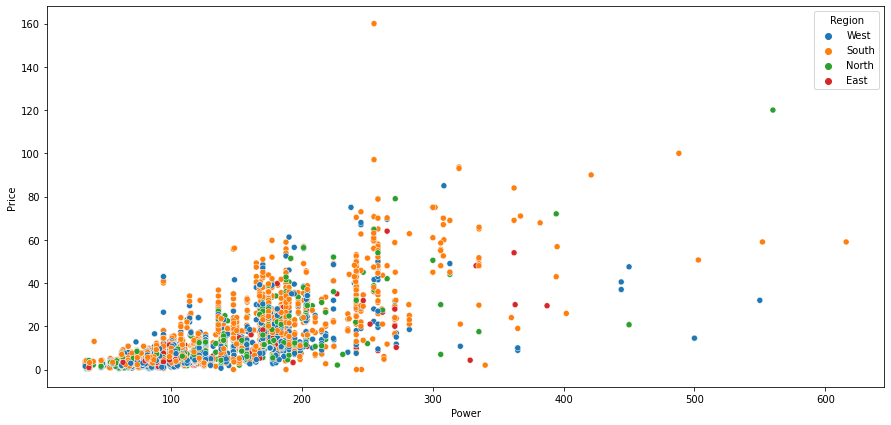

In [42]:
#Price Vs Power Vs Region
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,y='Price',x='Power',hue='Region')
plt.show()

**Observations**:
- Price does increase with Power, but we can also see several exceptions.

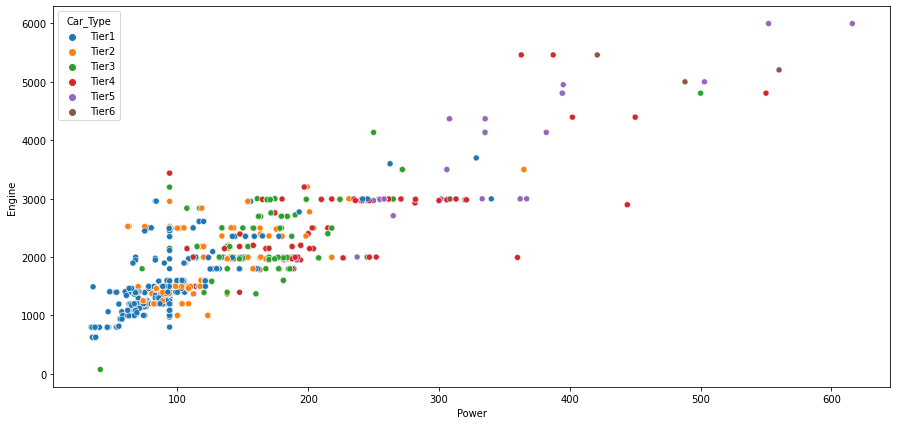

In [43]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,y='Engine',x='Power',hue='Car_Type')
plt.show()

**Observations**:
- From the plot, we see that all three variables have a positive correlation.
- This also suggest multicolinearity between Engine and Power, which must be addressed later

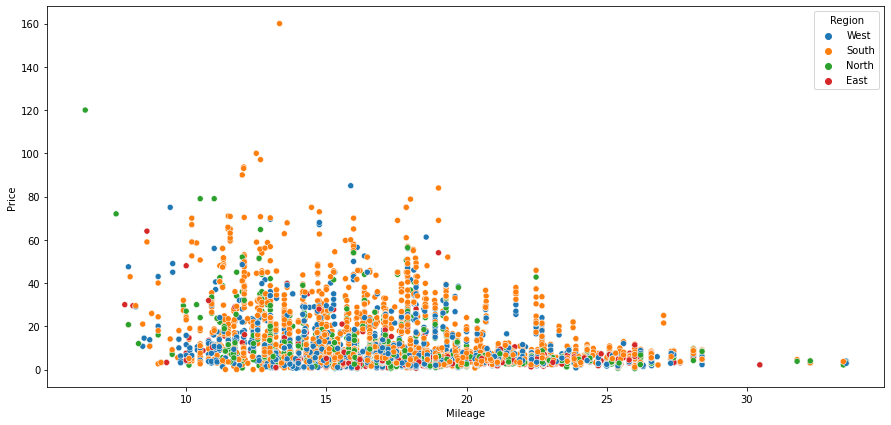

In [44]:
#Price Vs Mileage Vs Region
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,y='Price',x='Mileage',hue='Region')
plt.show()

**Observations**:
* Price and Mileage have a negative correlation with a few exceptions

<Axes: xlabel='Engine', ylabel='Mileage'>

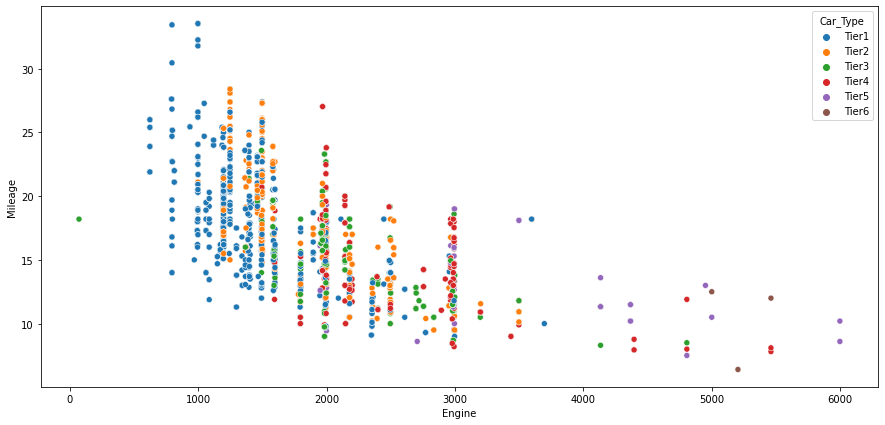

In [45]:
#Engine Vs Mileage Vs Car_Type
plt.figure(figsize=(15,7))
sns.scatterplot(x='Engine', y='Mileage',hue='Car_Type',
             data=df)

**Observations**:
- Most cars in Tier1 have less Engine CC and therefore Higher Mileage

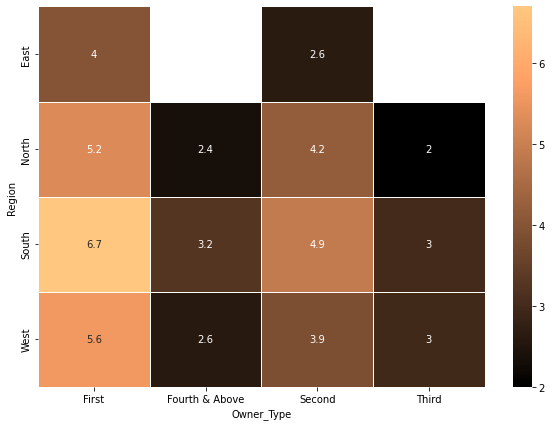

In [46]:
#Does type of ownership affect Car price?
df_hm =df.pivot_table(index = 'Region',columns ='Owner_Type',values ="Price",aggfunc=np.median)
# Draw a heatmap 
plt.subplots(figsize=(10,7))
sns.heatmap(df_hm,cmap='copper',linewidths=.5, annot=True);

**Observations**:
* Mean Price of cars decrease as number of ownership of cars increases across all regions
* The South region also has the highest Median Price for Cars with only one previous owner, followed by West then North and East
* We also see that in East there are only two Owner_types
* This suggests that type of ownership does affects overall car price.

<Axes: xlabel='Fuel_Type', ylabel='Price'>

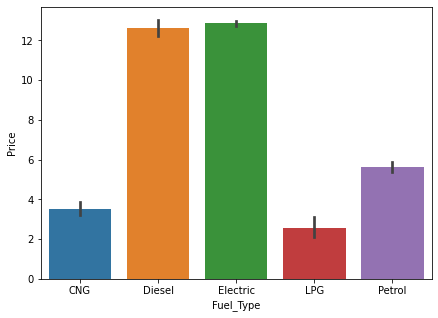

In [47]:
#Does type of Fuel affect car price?
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Fuel_Type',y='Price')

**Observations**: 
* Electric Car's have an equal Price range compared to Diesel.
* We know that there are only two cars with Electric Fuel_Type in this data, which is a very small sample size.
* Hence we will drop Fuel_Type while building the ML model, as it might affect the accuracy.

## Outliers Treatment

In [48]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
   
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    
    for c in col_list:
        df = treat_outliers(df,c)
        
        
    return df    

### We will build a Predictive model with and without treating the Outliers and compare it's performances to decide if the outliers have any adverse impact to the linear model.

In [49]:
df2=df.copy() #making the first copy
numerical_col = df2.select_dtypes(include=np.number).columns.tolist()
numerical_col.remove('Year')
numerical_col.remove('Mileage')
numerical_col.remove('Seats')  #Dropping Year,Mileage and Seats as they dont have very high outliers
numerical_col


['Kilometers_Driven', 'Engine', 'Power', 'Price']

In [50]:
df2 = treat_outliers_all(df2,numerical_col) #treating outliers 

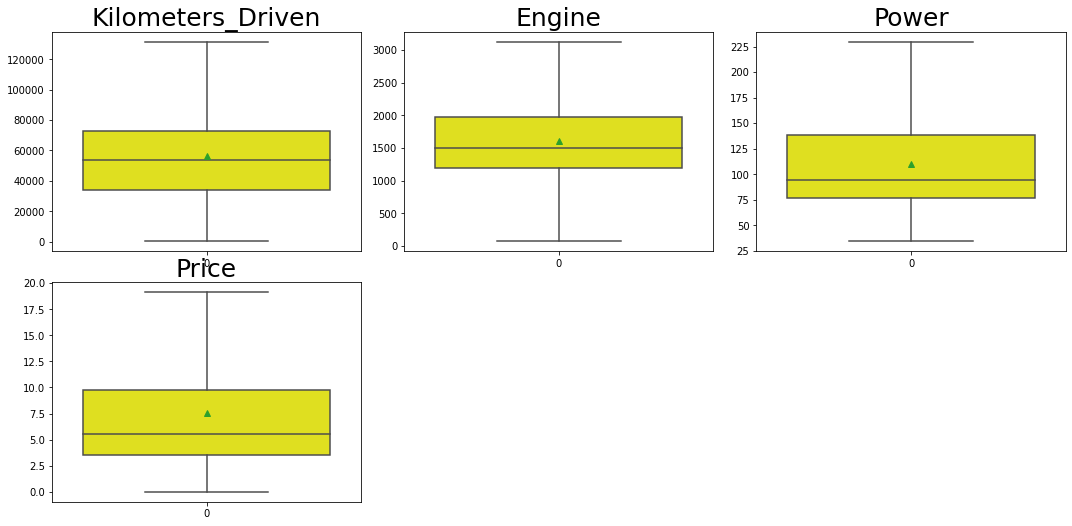

In [51]:
#checking if the outliers are treated
plt.figure(figsize=(15,35))
for i in range(len(numerical_col)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df2[numerical_col[i]],showmeans=True, color='yellow')
    plt.tight_layout()
    plt.title(numerical_col[i],fontsize=25)

plt.show()

**Observations:**
- The Outliers for Engine, Price, Power and Kilometers_driven is treated
- We will build a model with this treated dataset to analyse the Price

## Model Building 1 - With Treated Outliers

In [52]:
df2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Region,Car_Type
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,1.750,West,Tier1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,12.500,West,Tier3
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,4.500,South,Tier1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,6.000,South,Tier2
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,17.740,South,Tier3


In [53]:
#Defining X and y variables

In [54]:
X = df2.drop(['Name','Fuel_Type','Location','Price'], axis=1)
#dropping Name as we bins via Car_Type
#dropping Fuel_Type to not affect the accuracy of the model
y = df2[['Price']]

print(X.shape)
print(y.shape)

(7251, 10)
(7251, 1)


In [55]:
#Creating Dummy Variabls for the Categorical Columns
#Dummy variable will be used as independent variables and will not impose any ranking
X = pd.get_dummies(X, columns=['Transmission','Owner_Type','Region','Car_Type'], drop_first=True)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Region_North,Region_South,Region_West,Car_Type_Tier2,Car_Type_Tier3,Car_Type_Tier4,Car_Type_Tier5,Car_Type_Tier6
0,2010,72000,26.600,998.000,58.160,5.000,1,0,0,0,0,0,1,0,0,0,0,0
1,2015,41000,19.670,1582.000,126.200,5.000,1,0,0,0,0,0,1,0,1,0,0,0
2,2011,46000,18.200,1199.000,88.700,5.000,1,0,0,0,0,1,0,0,0,0,0,0
3,2012,87000,20.770,1248.000,88.760,7.000,1,0,0,0,0,1,0,1,0,0,0,0
4,2013,40670,15.200,1968.000,140.800,5.000,0,0,1,0,0,1,0,0,1,0,0,0


In [56]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56) # keeping random_state =56 ensuring datasplit remains consistent
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Region_North,Region_South,Region_West,Car_Type_Tier2,Car_Type_Tier3,Car_Type_Tier4,Car_Type_Tier5,Car_Type_Tier6
1928,2016,55100,17.010,1582.000,126.200,5.000,0,0,0,0,0,0,1,0,1,0,0,0
6278,2012,90000,23.590,1364.000,94.000,5.000,1,0,0,0,0,1,0,0,0,0,0,0
22,2015,55985,13.530,1984.000,177.010,5.000,0,0,0,0,0,0,1,0,0,1,0,0
5925,2010,85000,17.500,1798.000,94.000,5.000,1,0,0,0,0,0,1,0,0,0,0,0
5762,2014,51000,27.030,1969.000,190.000,5.000,0,0,0,0,0,1,0,0,0,1,0,0


In [57]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)
print("Intercept of the linear equation:", linearregression.intercept_) 
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linearregression.coef_[0][idx]))
                         

Intercept of the linear equation: [-404.87654936]
The coefficient for Year is 0.2014249816152111
The coefficient for Kilometers_Driven is -1.6203755332221658e-06
The coefficient for Mileage is 0.04349748263038988
The coefficient for Engine is 0.0007955011277483536
The coefficient for Power is 0.01600544024152847
The coefficient for Seats is 0.07091913468838681
The coefficient for Transmission_Manual is -0.742296150230075
The coefficient for Owner_Type_Fourth & Above is 0.540648125919407
The coefficient for Owner_Type_Second is -0.09782155395636077
The coefficient for Owner_Type_Third is -0.23169983508214276
The coefficient for Region_North is 0.21245763647508514
The coefficient for Region_South is 0.38988114099756693
The coefficient for Region_West is 0.26965728280937423
The coefficient for Car_Type_Tier2 is 2.603325608632856
The coefficient for Car_Type_Tier3 is 8.59866532891517
The coefficient for Car_Type_Tier4 is 12.049331760790816
The coefficient for Car_Type_Tier5 is 10.894805905

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test) 

### Model Performances:

In [59]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)

0.8903015607952992

In [60]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

1.2151844128866212

In [61]:
# R-squared on test
r2_score(y_test, pred)

0.953619392106915

In [62]:
# Training Score

linearregression.score(X_train, y_train)  # 70 % data 

0.9520061630151408

In [63]:
# Testing score

linearregression.score(X_test, y_test) # unseen data

0.953619392106915

**Observations**:
- From the above model we see that the  $R^2$ is 0.953, that explains 95.3% of total variation in dataset. This model is a good fit.

## Model Building 2 - Without Treating Outliers

In [64]:
df3=df.copy() #making the second copy
df3.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Region,Car_Type
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,1.750,West,Tier1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,12.500,West,Tier3
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,4.500,South,Tier1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,6.000,South,Tier2
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,17.740,South,Tier3


In [65]:
X1 = df3.drop(['Name','Fuel_Type','Location','Price'], axis=1)
#dropping Name as we bins via Car_Type
#dropping Fuel_Type to not affect the accuracy of the model
y1 = df3[['Price']]

print(X1.shape)
print(y1.shape)

(7251, 10)
(7251, 1)


In [66]:
#Creating Dummy Variabls for the Categorical Columns
#Dummy variable will be used as independent variables and will not impose any ranking
X1 = pd.get_dummies(X1, columns=['Transmission','Owner_Type','Region','Car_Type'], drop_first=True)
X1.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Region_North,Region_South,Region_West,Car_Type_Tier2,Car_Type_Tier3,Car_Type_Tier4,Car_Type_Tier5,Car_Type_Tier6
0,2010,72000,26.600,998.000,58.160,5.000,1,0,0,0,0,0,1,0,0,0,0,0
1,2015,41000,19.670,1582.000,126.200,5.000,1,0,0,0,0,0,1,0,1,0,0,0
2,2011,46000,18.200,1199.000,88.700,5.000,1,0,0,0,0,1,0,0,0,0,0,0
3,2012,87000,20.770,1248.000,88.760,7.000,1,0,0,0,0,1,0,1,0,0,0,0
4,2013,40670,15.200,1968.000,140.800,5.000,0,0,1,0,0,1,0,0,1,0,0,0


In [67]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=56)
X1_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Region_North,Region_South,Region_West,Car_Type_Tier2,Car_Type_Tier3,Car_Type_Tier4,Car_Type_Tier5,Car_Type_Tier6
1928,2016,55100,17.010,1582.000,126.200,5.000,0,0,0,0,0,0,1,0,1,0,0,0
6278,2012,90000,23.590,1364.000,94.000,5.000,1,0,0,0,0,1,0,0,0,0,0,0
22,2015,55985,13.530,1984.000,177.010,5.000,0,0,0,0,0,0,1,0,0,1,0,0
5925,2010,85000,17.500,1798.000,94.000,5.000,1,0,0,0,0,0,1,0,0,0,0,0
5762,2014,51000,27.030,1969.000,190.000,5.000,0,0,0,0,0,1,0,0,0,1,0,0


In [68]:
#Fitting linear model
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X1_train, y1_train)                                  
print("Intercept of the linear equation:", linearregression.intercept_) 
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, linearregression.coef_[0][idx]))                         

Intercept of the linear equation: [-559.64477119]
The coefficient for Year is 0.2781520771164933
The coefficient for Kilometers_Driven is -3.933049214243903e-06
The coefficient for Mileage is 0.041173020980348786
The coefficient for Engine is 0.001253652461509809
The coefficient for Power is 0.02185719706079717
The coefficient for Seats is -0.10443213439519303
The coefficient for Transmission_Manual is -0.5553857640064689
The coefficient for Owner_Type_Fourth & Above is 1.0602936298239747
The coefficient for Owner_Type_Second is -0.01217613302230934
The coefficient for Owner_Type_Third is 0.19972117592183586
The coefficient for Region_North is 0.43423501867368147
The coefficient for Region_South is 0.6551430985062126
The coefficient for Region_West is 0.3849291968220912
The coefficient for Car_Type_Tier2 is 2.1873459098796886
The coefficient for Car_Type_Tier3 is 7.852889631704657
The coefficient for Car_Type_Tier4 is 21.448157673682104
The coefficient for Car_Type_Tier5 is 45.73101094

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred1 = linearregression.predict(X1_test)

In [70]:
# Mean Absolute Error on test
mean_absolute_error(y1_test, pred1)

1.512862782786983

In [71]:
# RMSE on test data
mean_squared_error(y1_test, pred1)**0.5

3.093684570463303

In [72]:
# R-squared on test
r2_score(y1_test, pred1)

0.9215069184355419

In [73]:
# Training Score

linearregression.score(X1_train, y1_train)  # 70 % data 

0.9450553498559193

In [74]:
# Testing score

linearregression.score(X1_test, y1_test) # unseen data

0.9215069184355419

**Observations**:
- From the above model we see that the  $R^2$ is 0.921, that explains 92.1% of total variation in dataset. Though this model is a decent fit, its less than the $R^2$ value from Model 1. 
- Also we see that the Training and Testing Scores for this model are 94.5% and 92.1% which has a marginal difference.
-  Hence we shall proceed with the Model 1 for further analysis and  Stats model.